# LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
# seed 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

#### 로이터 뉴스 데이터 불러오기

In [3]:
from keras.datasets import reuters


#### train ,test 셋 나누기

In [4]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=1000,test_split=0.2) # 빈도수가 1~1000 등인 단어 불러오기

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


#### 데이터 확인 후 출력

In [5]:
category = np.max(y_train)+1
print(category,'카텐고리')
print(len(X_train))
print(len(X_test))
print(X_test[0])

46 카텐고리
8982
2246
[1, 4, 2, 2, 9, 697, 2, 111, 8, 25, 109, 29, 2, 11, 150, 244, 364, 33, 30, 30, 2, 333, 6, 2, 159, 9, 2, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 2, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 2, 966, 2, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 2, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 2, 855, 129, 783, 21, 4, 2, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 2, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


- 46개의 카테고리
- 이미 인코딩은 되어있음

#### 각 단어의 길이 일정하게 맞춰주기

In [6]:
from keras.preprocessing import sequence

- 100까지 맞추고  빈칸은 0 으로 채움

In [7]:
x_train = sequence.pad_sequences(X_train,maxlen=100)
x_test = sequence.pad_sequences(X_test,maxlen=100)# 단어의 수를 100 까지


In [8]:
print(x_train)

[[  0   0   0 ...  15  17  12]
 [  0   0   0 ... 505  17  12]
 [ 19 758  15 ...  11  17  12]
 ...
 [  0   0   0 ... 407  17  12]
 [ 88   2  72 ... 364  17  12]
 [125   2  21 ... 113  17  12]]


#### y데이터 원핫 인코딩

In [9]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#### 모델 설계 및 실행

In [10]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [11]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

hist = model.fit(x_train,y_train,batch_size=100,epochs=10,validation_data= (x_test,y_test))



Epoch 1/10
90/90 [==============================] - 3s 18ms/step - loss: 1.1868 - accuracy: 0.7014 - val_loss: 1.3557 - val_accuracy: 0.6536
Epoch 2/10
90/90 [==============================] - 1s 12ms/step - loss: 1.0933 - accuracy: 0.7216 - val_loss: 1.2490 - val_accuracy: 0.6866
Epoch 3/10
90/90 [==============================] - 1s 13ms/step - loss: 1.0208 - accuracy: 0.7363 - val_loss: 1.2766 - val_accuracy: 0.6861
Epoch 4/10
90/90 [==============================] - 1s 13ms/step - loss: 0.9786 - accuracy: 0.7526 - val_loss: 1.2109 - val_accuracy: 0.6990
Epoch 5/10
90/90 [==============================] - 1s 13ms/step - loss: 0.9879 - accuracy: 0.7504 - val_loss: 1.1994 - val_accuracy: 0.7012
Epoch 6/10
90/90 [==============================] - 1s 13ms/step - loss: 0.9224 - accuracy: 0.7660 - val_loss: 1.2013 - val_accuracy: 0.7012
Epoch 7/10
90/90 [==============================] - 1s 13ms/step - loss: 0.9165 - accuracy: 0.7719 - val_loss: 1.1934 - val_accuracy: 0.6968
Epoch 8/10
90

#### 모델 평가

In [13]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.3559 - accuracy: 0.6558


[1.3559370040893555, 0.6558325886726379]

## 모델 정확도 시각화

No handles with labels found to put in legend.


[1.1597174406051636, 1.0937196016311646, 1.0466234683990479, 1.000143051147461, 0.9474250078201294, 0.9150516986846924, 0.8822917342185974, 0.8360366225242615, 0.8062569499015808, 0.7723526954650879]
[1.3557202816009521, 1.249014139175415, 1.2765952348709106, 1.2108900547027588, 1.1993720531463623, 1.2013394832611084, 1.1933729648590088, 1.1923474073410034, 1.1589912176132202, 1.2117085456848145]
<class 'numpy.ndarray'>
(10,)


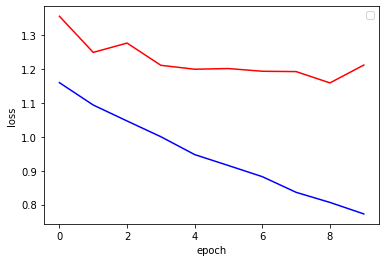

In [22]:
y_loss = hist.history['loss']
y_valloss = hist.history['val_loss']

print(y_loss)
print(y_valloss)

x_len = np.arange(len(y_loss))
print(type(x_len))
print(x_len.shape)
# print(y_loss.shape)

plt.plot(x_len,y_loss,c="blue")
plt.plot(x_len,y_valloss,c="red")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()


- 7번째 부터 val_loss 가 증가하므로 그 이후에 오버피팅으로 보임